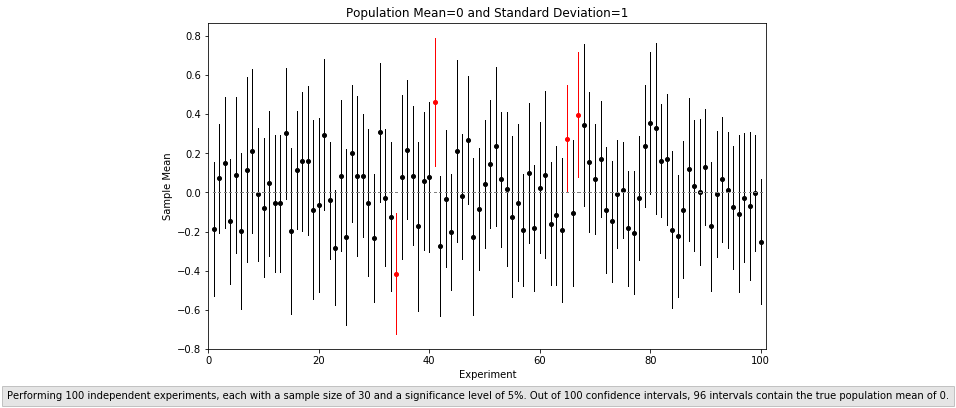

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 設定母體平均數和標準差
mu = 0
sigma = 1

# 設定樣本數和樣本大小
n_experiments = 100  # 進行100次獨立實驗
n_samples = 30  # 每次實驗抽樣30個樣本

# 進行實驗和計算信賴區間
sample_means = []
conf_intervals = []
for i in range(n_experiments):
    # 生成樣本
    samples = np.random.normal(mu, sigma, n_samples)
    
    # 計算樣本均值
    sample_mean = np.mean(samples)
    sample_means.append(sample_mean)

    # 計算信賴區間
    std_err = np.std(samples, ddof=1) / np.sqrt(n_samples)  # 標準誤
    z_score = norm.ppf(0.975)  # 95%信賴區間對應的Z值
    conf_interval = (sample_mean - z_score * std_err, sample_mean + z_score * std_err)
    conf_intervals.append(conf_interval)

# 繪製信賴區間和樣本均值
plt.figure(figsize=(10,6))
for i in range(n_experiments):
    x = i + 1
    y = sample_means[i]
    ci = conf_intervals[i]
    color = 'r' if not (ci[0] <= mu <= ci[1]) else 'k'  # 如果信賴區間不包含真實均值，則為紅色，否則為黑色
    plt.plot(x, y, 'o', markersize=4, color=color)
    plt.plot([x,x], [ci[0],ci[1]], '-', color=color, linewidth=1)
    plt.plot([x-0.2,x+0.2], [mu,mu], '-', color='grey', linewidth=1)

# 設定圖形標籤和標題
plt.xlabel('Experiment')
plt.ylabel('Sample Mean')
plt.title('Population Mean={} and Standard Deviation={}'.format(mu, sigma))

# 設定X軸範圍
plt.xlim([0, n_experiments+1])

# 新增一段話，顯示實驗設定和結果
ci_include_mu = sum([ci[0] <= mu <= ci[1] for ci in conf_intervals])
msg = f'Performing {n_experiments} independent experiments, each with a sample size of {n_samples} and a significance level of 5%. Out of {n_experiments} confidence intervals, {ci_include_mu} intervals contain the true population mean of {mu}.'
plt.figtext(0.5, 0.01, msg, ha="center", fontsize=10, bbox={"facecolor":"grey", "alpha":0.2, "pad":5})

#顯示圖形
plt.show()